In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [86]:
df = pd.read_csv('Sydney_Data.csv')

In [87]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

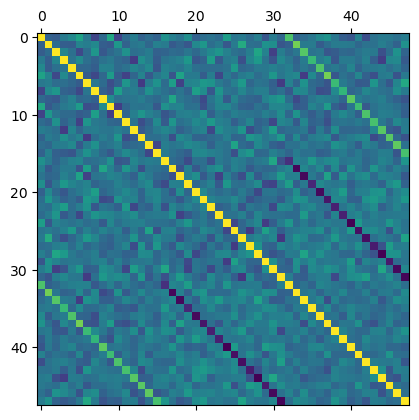

In [88]:
plt.matshow(X.corr())

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [91]:
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

,Coef
127.9439,-0.000805
264.9656,-0.004556
68.3481,-0.001838
521.757,-0.000535
443.6997,-0.002454
195.9648,0.001178
166.7701,-0.000979
504.285,0.001211
104.0226,-0.001801
205.2257,-0.000483


In [92]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.9999999957295178

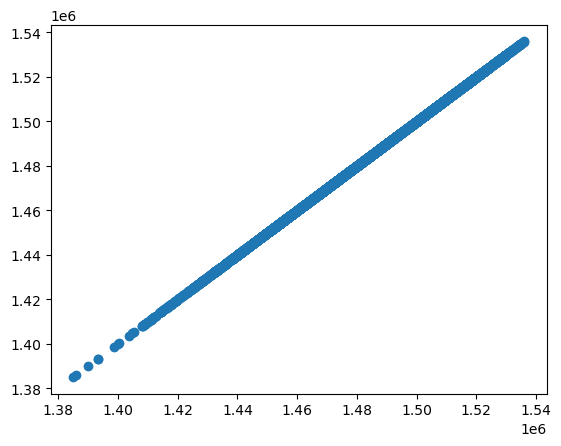

In [93]:
plt.scatter(y_test, predictions)

(array([  21.,  156.,  508., 1593., 3815., 5472., 2059.,  639.,  120.,
          17.]),
 array([-6.65157274, -5.41087261, -4.17017248, -2.92947236, -1.68877223,
        -0.4480721 ,  0.79262802,  2.03332815,  3.27402828,  4.51472841,
         5.75542853]),
 <BarContainer object of 10 artists>)

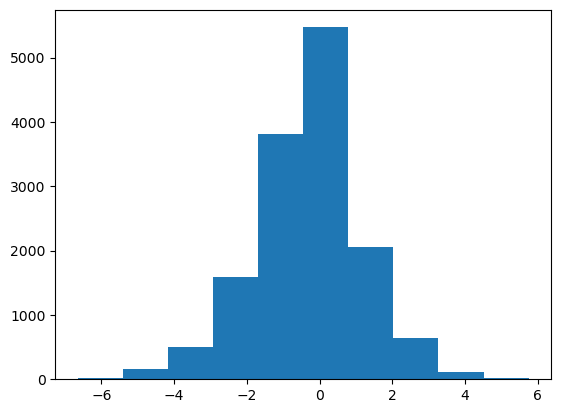

In [94]:
plt.hist(y_test - predictions)

In [95]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

1.1258925683167278

In [96]:
metrics.mean_squared_error(y_test, predictions)

2.276173513815828

In [97]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.5086992787881315

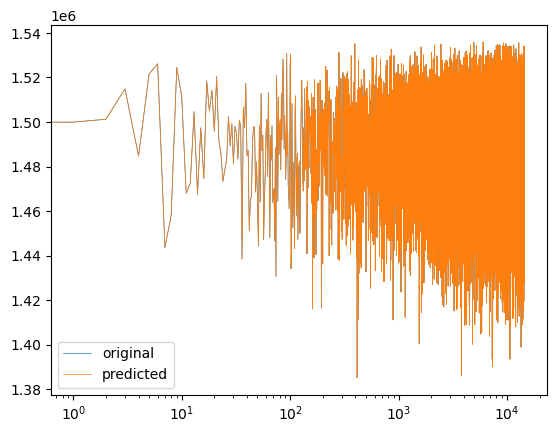

In [98]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original", linewidth=0.5)
plt.plot(x_ax, predictions, label="predicted", linewidth=0.5)
plt.xscale('log')
plt.legend()
plt.show()

# BOOST

In [99]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [100]:
score = xgbr.score(X, y)
score

0.9826622414189272

In [101]:
predictions_xgbr = xgbr.predict(X_test)

In [102]:
metrics.mean_absolute_error(y_test, predictions_xgbr)

2300.2026786111114

In [103]:
mean_squared_error(y_test, predictions_xgbr)

9172185.344497947

In [104]:
np.sqrt(mean_squared_error(y_test, predictions_xgbr))

3028.5615966161145

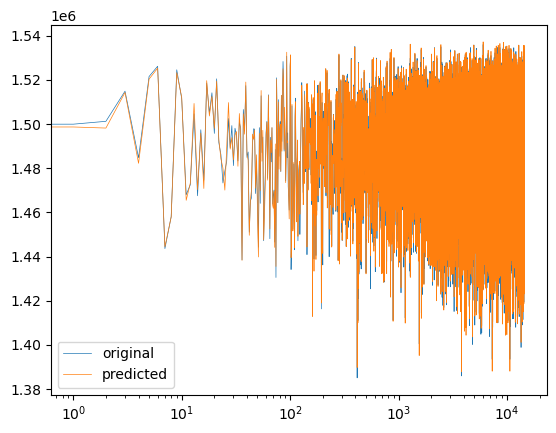

In [105]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original", linewidth=0.5)
plt.plot(x_ax, predictions_xgbr, label="predicted", linewidth=0.5)
plt.xscale('log')
plt.legend()
plt.show()